### Importing Necessary Libraries
In this cell, we are importing the required libraries for our analysis. The `openbb_terminal.sdk` provides tools for fetching stock data, while `quantstats` is used for statistical analysis of the stock data.

In [1]:
from openbb_terminal.sdk import openbb
import quantstats as qs

d:\anaconda3\envs\quant-stack\lib\site-packages\openbb_terminal\stocks\options\tmx_model.py:52: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  options_listings = pd.read_html(r.text)


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

### Loading and Visualizing Stock Data
In the following cell, we are loading daily stock data for Apple Inc. (AAPL) from June 1, 2012, to June 30, 2022. We then visualize the closing prices and a 30-day rolling average of the closing prices. Additionally, we calculate the daily returns for the stock.

In [2]:
# Load AAPL stock price data
data = openbb.stocks.load("AAPL",start_date="2023-01-01", end_date="2023-11-14")

Loading Daily data for AAPL with starting period 2023-01-03.

<Axes: xlabel='date'>

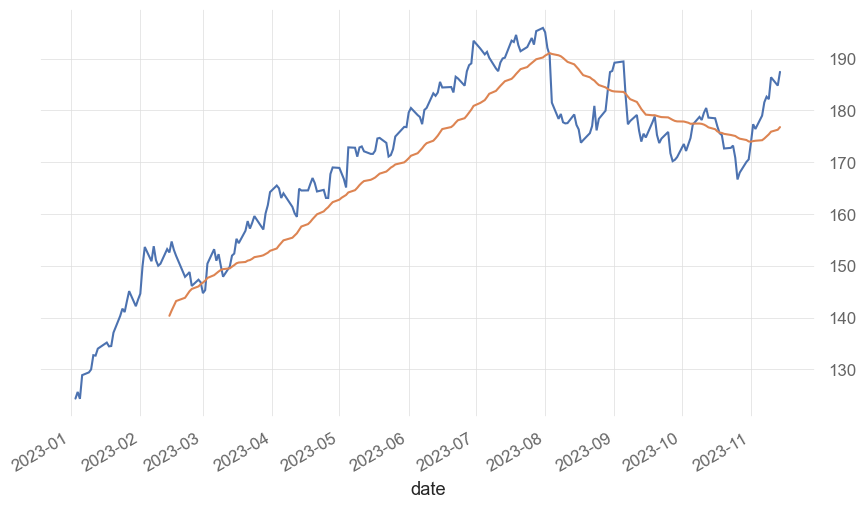

In [3]:
# Plot the closing plice
data.Close.plot()
# Compute the rolling 30-day moving average and plot it
data.Close.rolling(30).mean().plot()

<Axes: xlabel='date'>

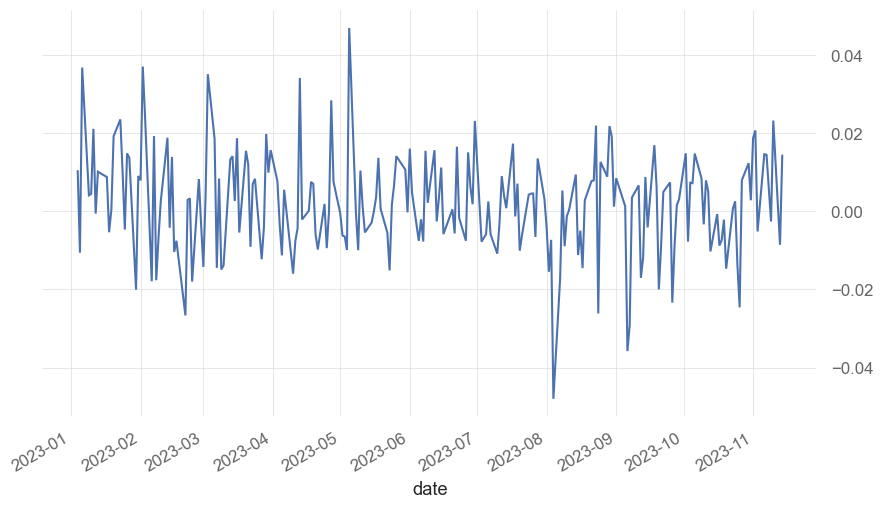

In [4]:

# Create a new DataFrame which computes the percentage change on the adjusted closing price
aapl_returns = data["Adj Close"].pct_change()
aapl_returns.plot()

### Analyzing Stock Performance Metrics
In this cell, we are using the `quantstats` library to generate a comprehensive report on the performance metrics of AAPL stock based on the daily returns we calculated earlier. This report includes metrics like Cumulative Return, Sharpe Ratio, Max Drawdown, and many others.

In [5]:
# Runn a rull metrics report on the returns you computed above
qs.reports.metrics(aapl_returns, mode='full')

                           Strategy
-------------------------  ----------
Start Period               2023-01-04
End Period                 2023-11-14
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          50.71%
CAGR﹪                     38.98%

Sharpe                     2.38
Prob. Sharpe Ratio         98.63%
Smart Sharpe               2.22
Sortino                    3.8
Smart Sortino              3.54
Sortino/√2                 2.69
Smart Sortino/√2           2.51
Omega                      1.48

Max Drawdown               -14.93%
Longest DD Days            106
Volatility (ann.)          20.81%
Calmar                     2.61
Skew                       -0.02
Kurtosis                   1.24

Expected Daily %           0.19%
Expected Monthly %         3.8%
Expected Yearly %          50.71%
Kelly Criterion            18.43%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.96%
Expected Shortfall (cVaR)  -1.96%

Max Consecutive Wins     